In [8]:
import pandas as pd
import re

In [4]:
magic = open("./data/magic.txt").readlines()

This is what the data looks like:

In [7]:
magic[0:5]

['CardName: Absorb CardCost: {W}{U}{U} CardType: Instant CardEffect: Counter target spell. You gain 3 life.\n',
 'CardName: Acclaimed Contender CardCost: {2}{W} CardType: Creature — Human Knight CardEffect: When Acclaimed Contender enters the battlefield, if you control another Knight, look at the top five cards of your library. You may reveal a Knight, Aura, Equipment, or legendary artifact card from among them and put it into your hand. Put the rest on the bottom of your library in a random order.\n',
 'CardName: Act of Treason CardCost: {2}{R} CardType: Sorcery CardEffect: Gain control of target creature until end of turn. Untap that creature. It gains haste until end of turn. (It can attack and {T} this turn.)\n',
 'CardName: Aerial Assault CardCost: {2}{W} CardType: Sorcery CardEffect: Destroy target tapped creature. You gain 1 life for each creature you control with flying.\n',
 'CardName: Aeromunculus CardCost: {1}{G}{U} CardType: Creature — Homunculus Mutant CardEffect: Flying 

Testing the regex code to filter information

In [27]:
# name
print(re.findall(r'CardName: (.*) CardCost', magic[0]))
# cost
print(re.findall(r'CardCost: (.*) CardType', magic[0]))
# type
print(re.findall(r'CardType: (.*) CardEffect', magic[0]))
# effect
print(re.findall(r'CardEffect: (.*)\n', magic[0]))

['Absorb']
['{W}{U}{U}']
['Instant']
['Counter target spell. You gain 3 life.']


Extracting information and converting it to a `pd.DataFrame`

In [34]:
magic_data = {"name": [],
              "cost": [],
              "type": [],
              "effect": []}

for magic_card in magic:
    magic_data["name"].append(re.findall(r'CardName: (.*) CardCost', magic_card)[0])
    magic_data["cost"].append(re.findall(r'CardCost: (.*) CardType', magic_card)[0])
    magic_data["type"].append(re.findall(r'CardType: (.*) CardEffect', magic_card)[0])
    magic_data["effect"].append(re.findall(r'CardEffect: (.*)\n', magic_card)[0])

magic_data = pd.DataFrame.from_dict(magic_data)

In [35]:
magic_data.head(5)

,name,cost,type,effect
0,Absorb,{W}{U}{U},Instant,Counter target spell. You gain 3 life.
1,Acclaimed Contender,{2}{W},Creature — Human Knight,When Acclaimed Contender enters the battlefiel...
2,Act of Treason,{2}{R},Sorcery,Gain control of target creature until end of t...
3,Aerial Assault,{2}{W},Sorcery,Destroy target tapped creature. You gain 1 lif...
4,Aeromunculus,{1}{G}{U},Creature — Homunculus Mutant,Flying {2}{G}{U}: Adapt 1. (If this creature h...


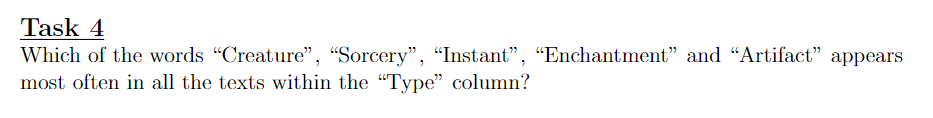

In [44]:
tokens_of_interest = ["Creature", "Sorcery", "Instant", "Enchantment", "Artifact"]

for token in tokens_of_interest:
    print(f"{token}: {magic_data.loc[:, ["type"]].apply(lambda row: len(re.findall(token, row["type"])), axis=1).sum()}")

Creature: 733
Sorcery: 185
Instant: 215
Enchantment: 85
Artifact: 108


Alternative way, which is more elegant

In [52]:
for token in tokens_of_interest:
    print(f"{token}: {magic_data.type.str.count(token).sum()}")

Creature: 733
Sorcery: 185
Instant: 215
Enchantment: 85
Artifact: 108
